<a href="https://colab.research.google.com/github/diptoromeo/MIT-IDSS-FoodHub-Project/blob/main/FDS_Project_(Dipto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [71]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [73]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [131]:
#copy the data
df.copy()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time,weekday_or_weekend
0,1477147,337525,Hangawi,Korean,30.75,3,NaN,25,20,23.0625,1970-01-01 00:00:00.000000045,weekday
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,3,NaN,25,23,10.2680,1970-01-01 00:00:00.000000048,weekday
2,1477070,66393,Cafe Habana,Mexican,12.23,3,5.0,23,28,10.3955,1970-01-01 00:00:00.000000051,weekday
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,3,3.0,25,15,21.9000,1970-01-01 00:00:00.000000040,weekday
4,1478249,76942,Dirty Bird to Go,American,11.59,3,4.0,25,24,9.8515,1970-01-01 00:00:00.000000049,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,3,5.0,31,17,16.7325,1970-01-01 00:00:00.000000048,weekday
1894,1477421,397537,The Smile,American,12.18,3,5.0,31,19,10.3530,1970-01-01 00:00:00.000000050,weekday
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,3,NaN,31,24,18.9150,1970-01-01 00:00:00.000000055,weekday
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,3,5.0,23,31,10.3530,1970-01-01 00:00:00.000000054,weekday


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [75]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [76]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [77]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [78]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated?

In [79]:
# Write the code here
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

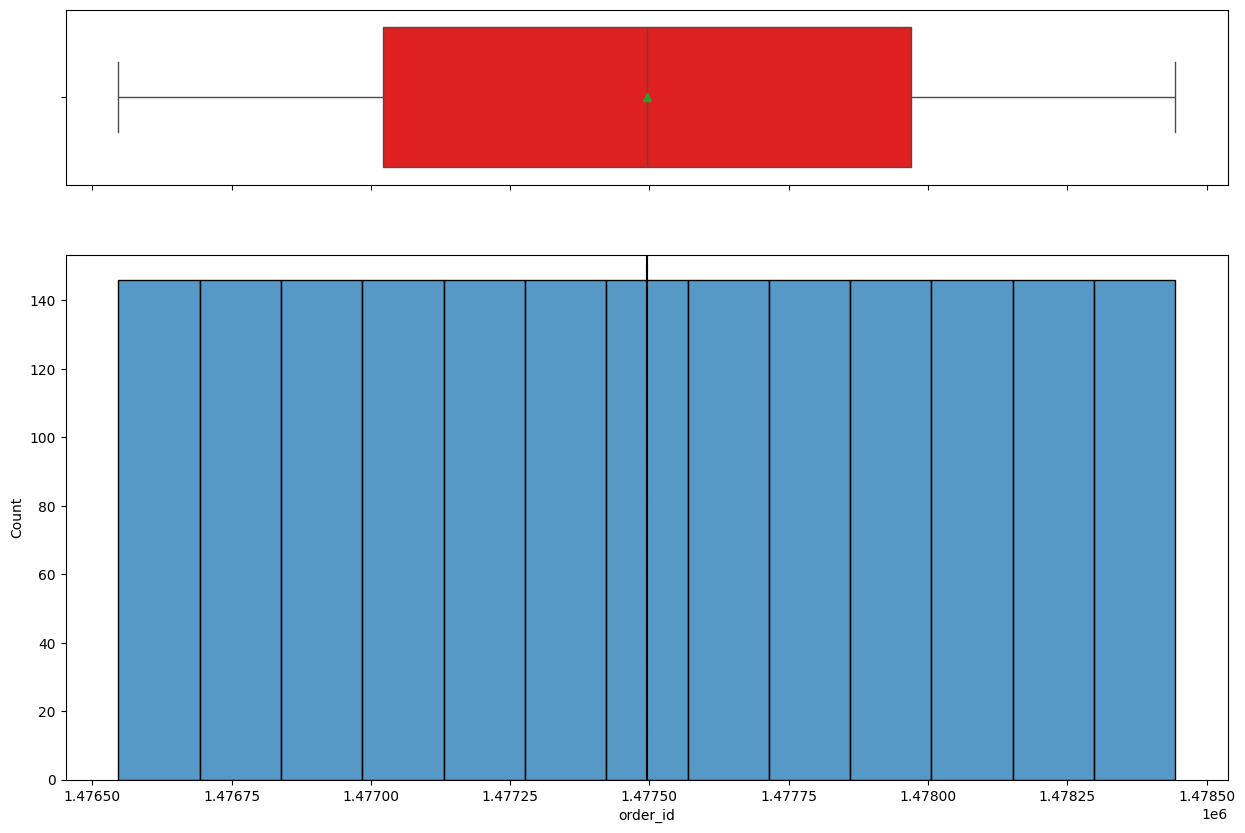

In [80]:
# Write the code here

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

histogram_boxplot(df.order_id)

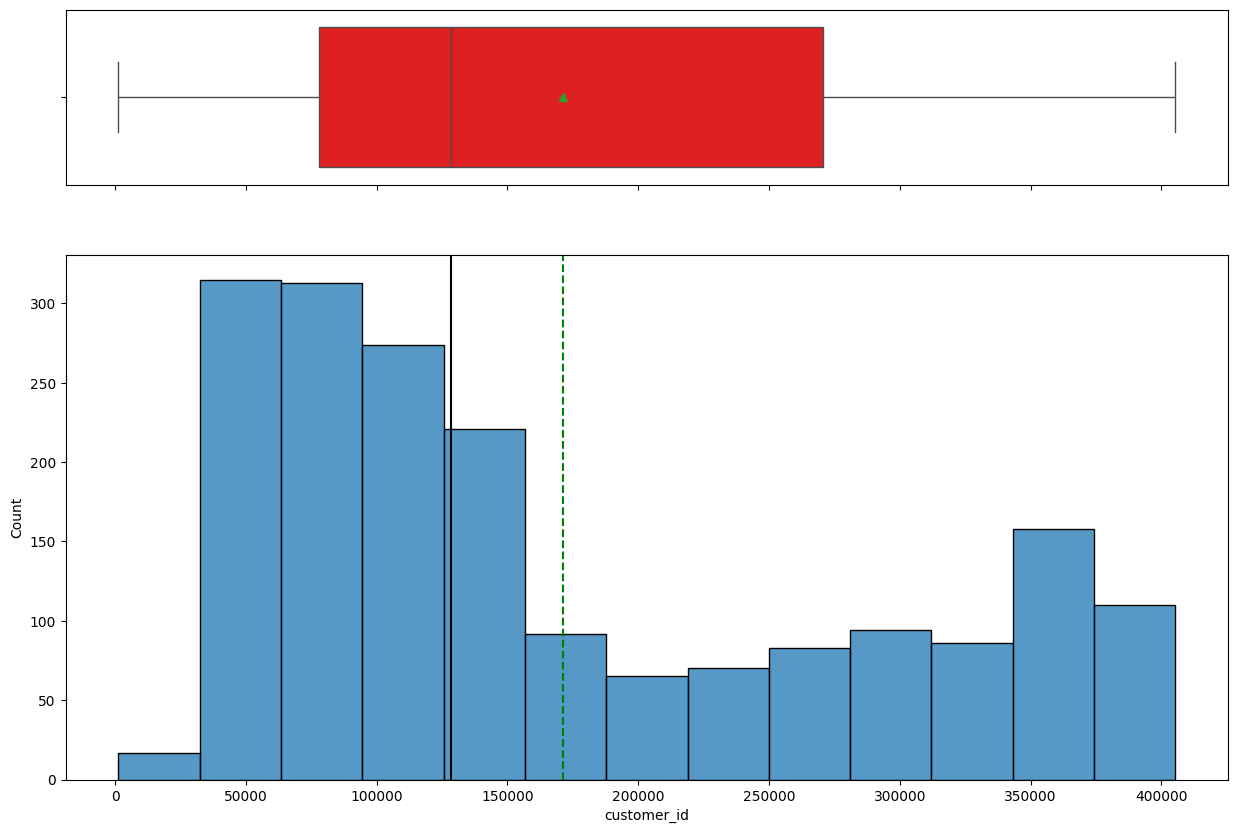

In [81]:
histogram_boxplot(df.customer_id)

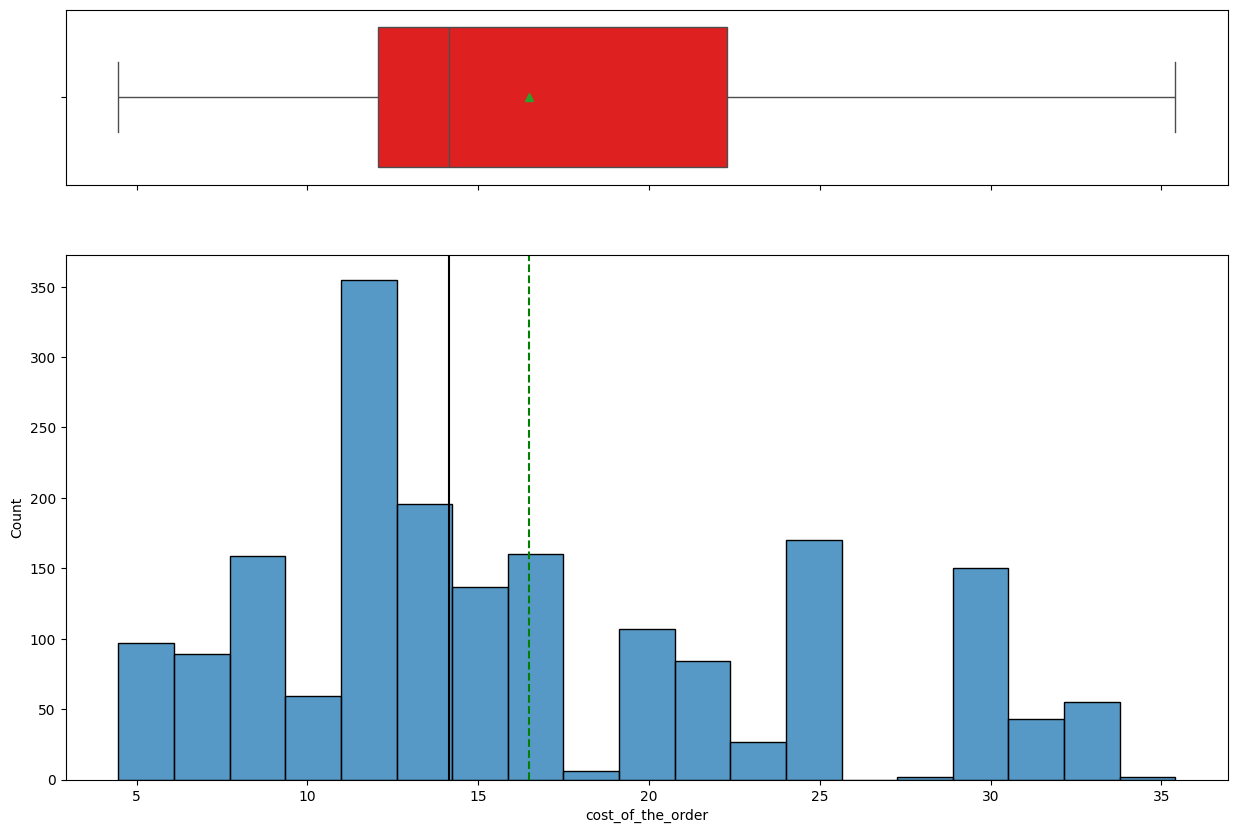

In [82]:
histogram_boxplot(df.cost_of_the_order)

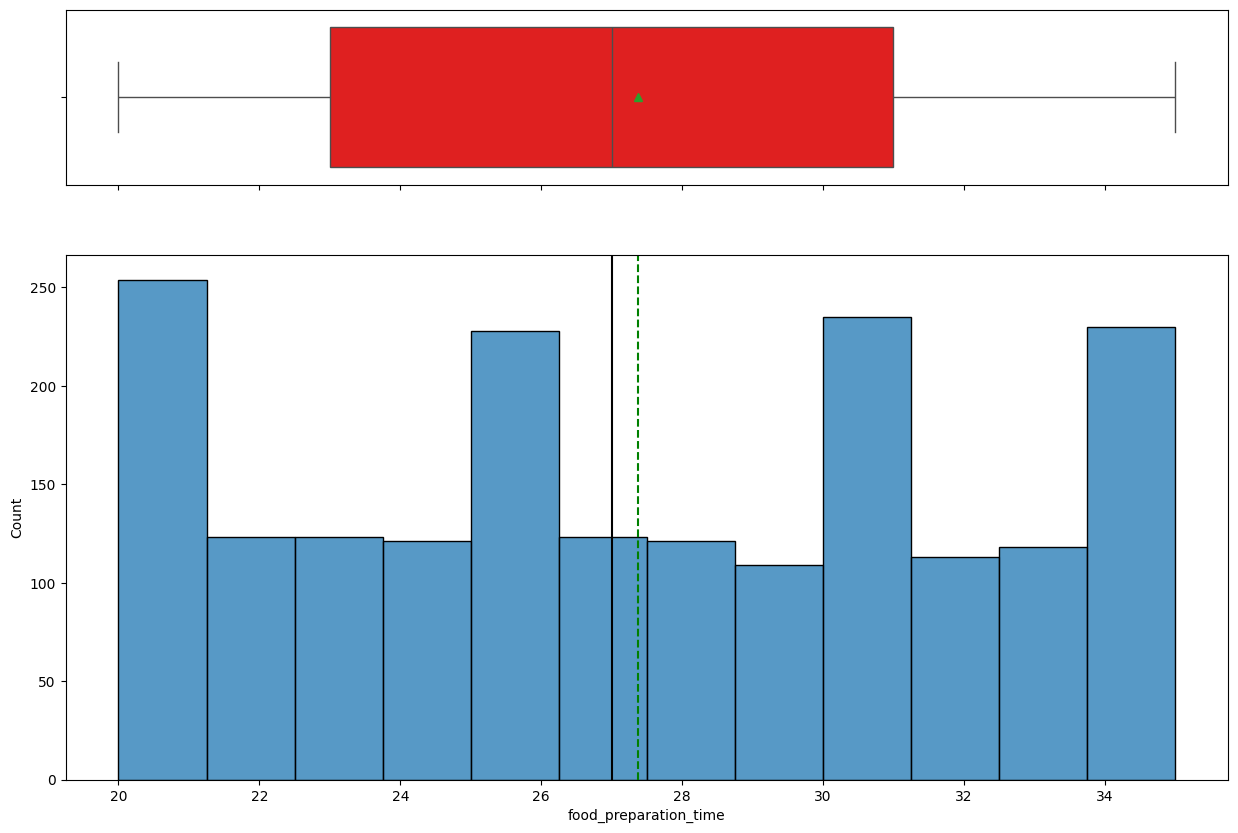

In [83]:
histogram_boxplot(df.food_preparation_time)

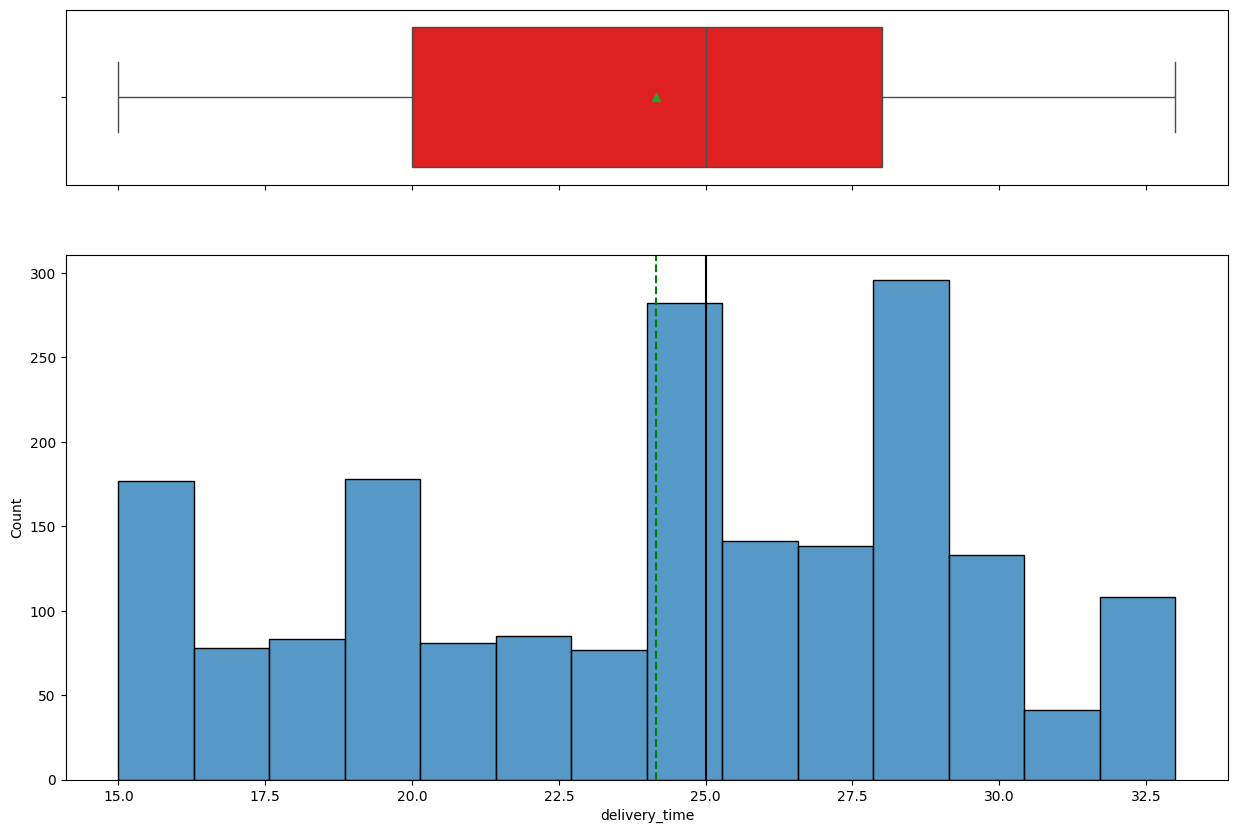

In [84]:
histogram_boxplot(df.delivery_time)


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [85]:
# Write the code here
df.sort_values(by='cost_of_the_order', ascending=False).head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [86]:
# Write the code here
weekends = df[df['day_of_the_week'].isin(['Weekend'])][['cuisine_type']]
print("Most popular cuisine on weekends:", weekends)

Most popular cuisine on weekends:      cuisine_type
0          Korean
1        Japanese
3        American
6         Italian
11        Mexican
...           ...
1891     American
1892      Chinese
1893      Mexican
1894     American
1897     Japanese

[1351 rows x 1 columns]


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [87]:
# Write the code here
orders_more_than_20 = df[df["cost_of_the_order"] > 20]
percentage = len(orders_more_than_20) / len("cost_of_the_order") * 100

print(f"{percentage:.2f}% of the orders cost more than 20 dollars.")

3264.71% of the orders cost more than 20 dollars.


#### Observations:


### **Question 10**: What is the mean order delivery time?

In [88]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time:", mean_delivery_time)

Mean order delivery time: 24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [89]:
# Write the code here
df_sorted = df.sort_values(by='customer_id', ascending=False)
top_3_customers = df_sorted[['customer_id','cost_of_the_order']].head(3)
print(top_3_customers)

     customer_id  cost_of_the_order
518       405334              25.22
656       404649              19.45
365       403833               6.69


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Axes: >

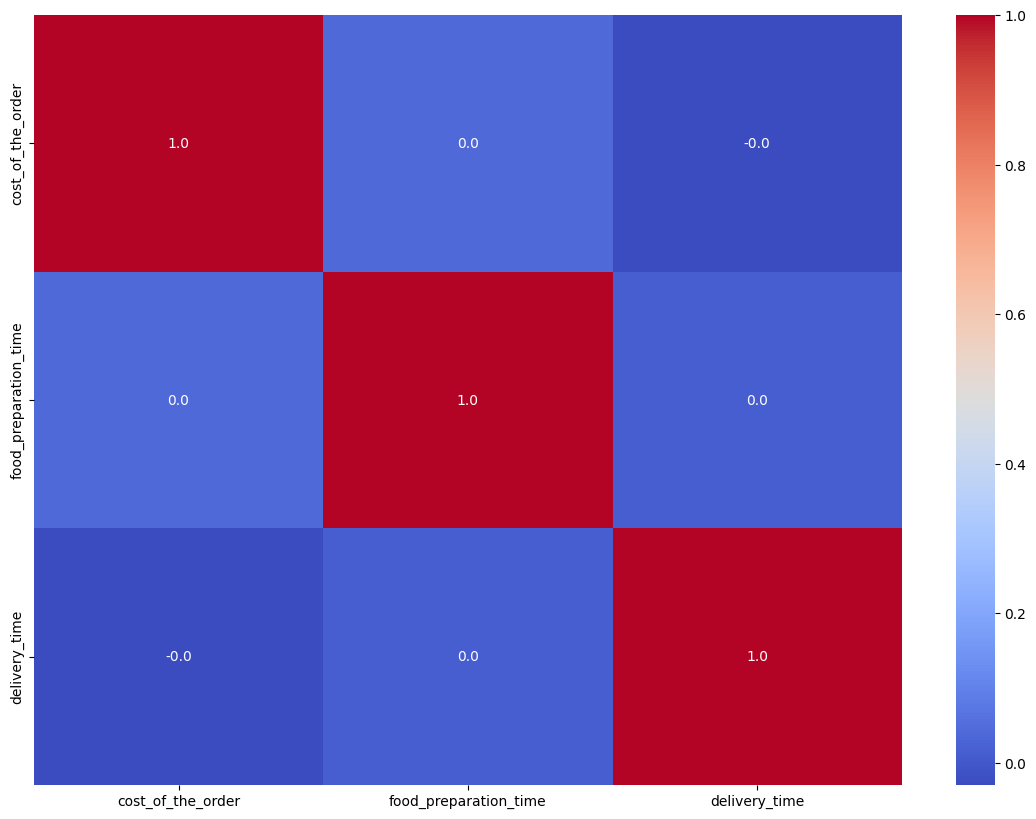

In [90]:
# Write the code here
num_var = ['cost_of_the_order',	'food_preparation_time',	'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [129]:
# Write the code here
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
)

# Filter the restaurants based on the criteria (rating count > 50 and average rating > 4)
eligible_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)]

# Print the eligible restaurants
print("Restaurants Fulfilling the Criteria to Get the Promotional Offer:")
print(eligible_restaurants)

Restaurants Fulfilling the Criteria to Get the Promotional Offer:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [118]:
# Write the code here
def calculate_revenue(order_cost):
    if order_cost > 20:
        return order_cost * 0.75  # 25% charge
    elif order_cost > 5:
        return order_cost * 0.85  # 15% charge
    else:
        return order_cost

df['revenue'] =  df['cost_of_the_order'].apply(calculate_revenue)
total_net_revenue = df['revenue'].sum()
print("Total Net Revenue Generated by the Company: ${:.2f}".format(total_net_revenue))

Total Net Revenue Generated by the Company: $25148.52


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [119]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Determine the percentage of orders that take more than 60 minutes to get delivered
total_orders = len(df)
orders_more_than_60_minutes = len(df[df['total_time'] > 60])
percentage_orders_more_than_60_minutes = (orders_more_than_60_minutes / total_orders) * 100

# Print the percentage of orders that take more than 60 minutes to get delivered
print("Percentage of Orders Taking More Than 60 Minutes to Get Delivered: {:.2f}%".format(percentage_orders_more_than_60_minutes))

Percentage of Orders Taking More Than 60 Minutes to Get Delivered: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [123]:
# Write the code here
df['total_time'] = pd.to_datetime(df['total_time'])
df['day_of_the_week'] = df['total_time'].dt.dayofweek

# Create a new column to categorize orders as either weekday (0-4) or weekend (5-6)
df['weekday_or_weekend'] = df['day_of_the_week'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

# Calculate the mean delivery time for weekday orders and weekend orders separately
mean_delivery_time_weekday = df[df['weekday_or_weekend'] == 'weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['weekday_or_weekend'] == 'weekend']['delivery_time'].mean()

# Print the mean delivery time for weekday and weekend orders
print("Mean Delivery Time for Weekday Orders: {:.2f} minutes".format(mean_delivery_time_weekday))
print("Mean Delivery Time for Weekend Orders: {:.2f} minutes".format(mean_delivery_time_weekend))

Mean Delivery Time for Weekday Orders: 24.16 minutes
Mean Delivery Time for Weekend Orders: nan minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*This analysis are users exhibit preferences for specific cuisines, highlighting the necessity for targeted recommendations and promotions High-rated restaurants with efficient delivery services are favored, emphasizing the significance of partnering with top-performing establishments. Enhancing delivery times and order fulfillment rates is vital for improving overall user satisfaction. Utilizing customer feedback is essential for identifying areas of improvement and enhancing service quality. Opportunities exist for market expansion into new or underserved areas to increase market share and attract new users.

### Recommendations:

* **Highly Rated and Popular Restaurants:** Restaurants with a high average rating and a large number of ratings (indicative of popularity) are more likely to attract customers. These restaurants should be given priority in promotional activities to capitalize on their positive reputation and customer base.

* **Cuisine Type Analysis:** Analyze the popularity and rating trends across different cuisine types. Identify which cuisines are most popular among customers and ensure that the menu offerings are diverse and cater to varied preferences. Additionally, monitor feedback ratings for each cuisine type to identify areas for improvement and menu optimization.

---